Lets see which one is the most crowed station. 

In [1]:
import numpy as np 
import pandas as pd
import datetime

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Data/trip.csv")
df.start_date = pd.to_datetime(df.start_date, format='%m/%d/%Y %H:%M') 
df.end_date = pd.to_datetime(df.end_date, format='%m/%d/%Y %H:%M')


Por resultados anteriores, limpamos el set de datos con viajes mayores a 3 min y menores a 370

In [2]:
df.duration /= 60
df = df[df.duration <= 370]
df = df[df.duration >3]
#Ver el analisis de flor sobre los nombres mal escritos de las estaciones " post at kearny"

# Cuál es la estación de donde salieron más viajes ? Rta. ID: 70 - buscar nombre

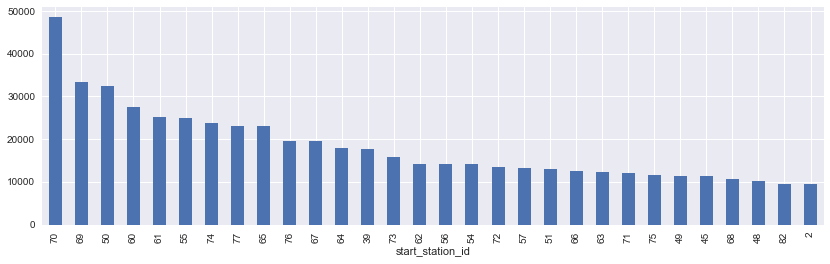

In [33]:

df.groupby('start_station_id').count()['id'].sort_values(ascending=False)[0:30].plot(kind='bar',figsize=(14,4))

# Cuál es la estación a la que llegaron más viajes? Rta. ID: 70 - buscar nombre

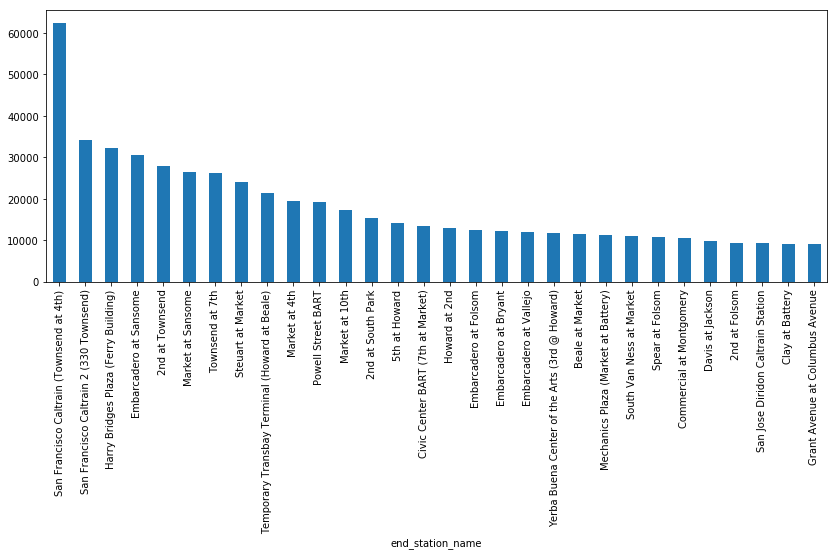

In [5]:
df.groupby('end_station_name').count()['id'].sort_values(ascending=False)[0:30].plot(kind='bar',figsize=(14,5))

# Concetración de estaciones con heatmap

In [25]:

import gmplot
gmap = gmplot.GoogleMapPlotter(37.336, -121.894074, 16)
gmap.heatmap(stations.lat, stations.long)  
gmap.draw("concetraciónDeEstaciones.html")


In [ ]:
En el mapa se puede ver dos puntos de mayor concentracion de estaciones, En san josé y en San francisco. 
Siendo ésta última la que mayor concentración de estaciones de bicicletas posee.

# Heatmap de donde salen más cantidad de viajes. 


In [21]:
googlePlotMap= df.loc[:,['start_station_id','end_station_id']]
googlePlotMap.columns = ['id' , 'end_station_id']
stationPlot = stations.loc[:,['id','lat','long']]
innerJoin = pd.merge(googlePlotMap,stationPlot, on='id', how='inner')

import gmplot
gmap = gmplot.GoogleMapPlotter(37.336, -121.894074, 16)
gmap.heatmap(innerJoin.lat, innerJoin.long)  
gmap.draw("startStationIdHeatMap.html")


Se puede ver que en la ciudad de San francisco se ve una mayor concentración de donde salen los viajes. A diferencia de san josé,o mountain view
. Esto se debe a que en san francisco se realizan mayor cantidad de viajes. 

# Analizar sólo en san francisco caapitall 

# Análogo al plot anterior, pero a donde se dirigen los viajes. 

In [24]:
#Heatmap a donde llegan la mayor cantidad de viajes. 
googlePlotMap= df.loc[:,['start_station_id','end_station_id']]
googlePlotMap.columns = ['start_station_id' , 'id']
stationPlot = stations.loc[:,['id','lat','long']]
innerJoin = pd.merge(googlePlotMap,stationPlot, on='id', how='inner')

import gmplot
gmap = gmplot.GoogleMapPlotter(37.336, -121.894074, 16)
gmap.heatmap(innerJoin.lat, innerJoin.long)  
gmap.draw("endStationIdHeatMap.html")


Se puede ver en "endStationIdHeatMap" que en san francisco hay 2 puntos donde más llegan los viajes. En la estaciónd de trenes calltrain (y sus estaciones más cercanas) y en el puerto del ferry.

# Posiciones de las estaciones en google maps

In [27]:

stations = pd.read_csv("Data/station.csv")

googlePlotMap= df.loc[:,['start_station_id','end_station_id']]
googlePlotMap.columns = ['id' , 'end_station_id']


groupedby = googlePlotMap.groupby('id',as_index=False).count()
stationPlot = stations.loc[:,['id','lat','long']]
innerJoin = pd.merge(groupedby,stationPlot, on='id', how='inner')

import gmplot

gmap = gmplot.GoogleMapPlotter(37.336, -121.894074, 16)
#gmap.plot(innerJoin.lat, innerJoin.long, 'cornflowerblue', edge_width=4)
for index, row in innerJoin.iterrows():
    gmap.scatter([row['lat']], [row['long']], '#FFFFFF', row['end_station_id']*0.005, marker=False)
    gmap.marker(row['lat'],row['long'],color='#FF0000',title=str(row['id']))
    
gmap.draw("mymap.html")




In [32]:
from_to = df[df['end_station_id'] == 2].groupby('start_station_id').size()
#from_to.sort_values(ascending=False)[0:72].plot(kind='bar',figsize=(14,5))
#from_to.sort_values(ascending=False)

# Veamos las realaciones que hay entre las estaciones ( cantidad de viajes entre ellas)

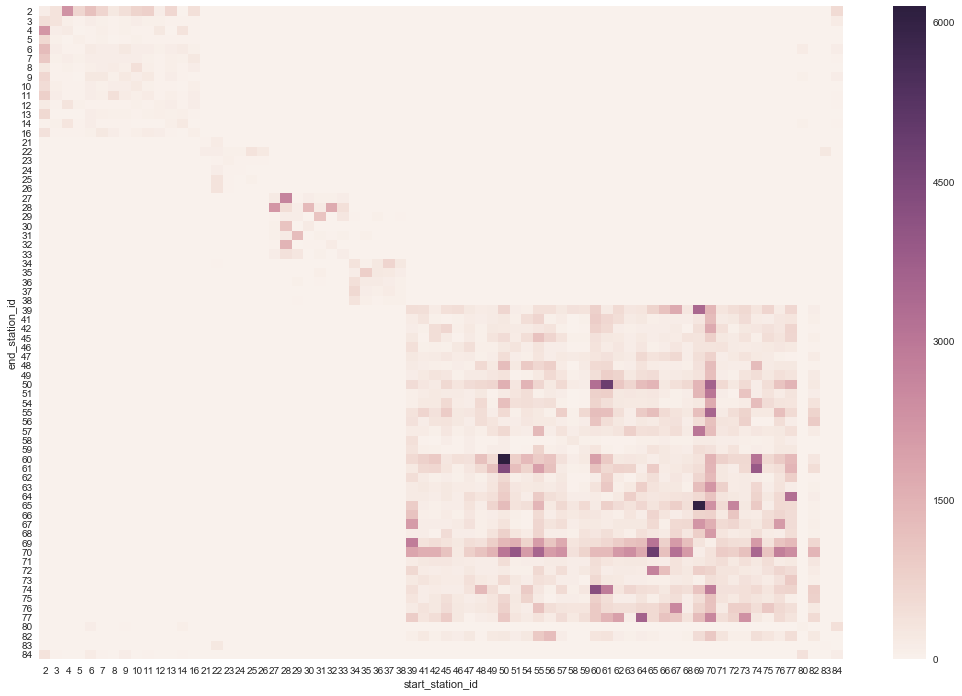

In [30]:
import seaborn as sns


fig, ax = plt.subplots(figsize=(18,12))     

pd.crosstab(df['end_station_id'],df['start_station_id'])
sns.heatmap(pd.crosstab(df['end_station_id'],df['start_station_id']));


# Relaciones entre estaciones (cant viajes) en una franja horaria determinada


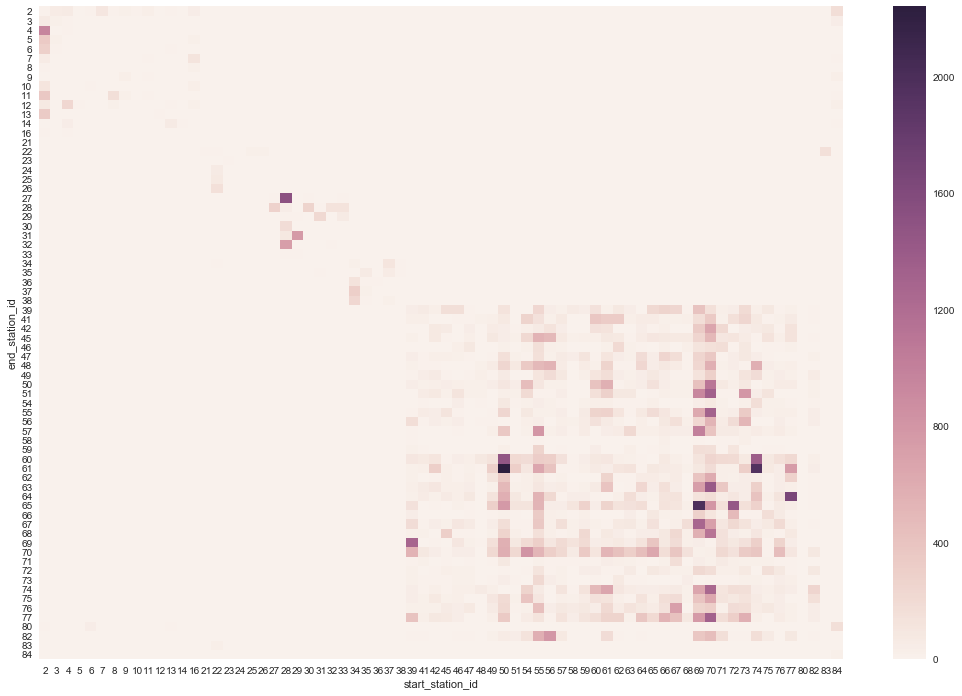

In [31]:
#ahora veo la relacion entre estaciones pero por una franja horaria.
#prueba = df[(df.start_station_id < 20 )]
#prueba = prueba[(prueba.end_station_id <20 )]
prueba = df
prueba['hour'] =  pd.to_datetime(df['start_date']).dt.hour
prueba = prueba[prueba.hour > 7]
prueba = prueba[prueba.hour < 10]

fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
#prueba = df

sns.heatmap(pd.crosstab(prueba['end_station_id'],prueba['start_station_id']));


